# Метод главных компонент (PCA-Principal Component Analysis)

Применим его к обработанным данным с новыми признаками

In [21]:
import pandas as pd

data = pd.read_csv('data/processed/nnapartment_more_info_new_features2.csv')

In [22]:
data.district.unique()

array(['Автозаводский район', 'Советский район', 'Канавинский район',
       'Московский район', 'дер. Анкудиновка', 'Нижегородский район',
       'Сормовский район', 'Ленинский район'], dtype=object)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rooms             321 non-null    float64
 1   area1             321 non-null    float64
 2   district          321 non-null    object 
 3   building_type     321 non-null    object 
 4   price             321 non-null    int64  
 5   year_type         321 non-null    object 
 6   no_first_no_last  321 non-null    bool   
 7   area3_bins        321 non-null    float64
dtypes: bool(1), float64(3), int64(1), object(3)
memory usage: 18.0+ KB


In [24]:
numeric_cols = [col for col in data.columns if data.dtypes[col] != 'O']
numeric_cols

['rooms', 'area1', 'price', 'no_first_no_last', 'area3_bins']

In [25]:
X = data[numeric_cols[:3]+numeric_cols[5:]]
X

,rooms,area1,price
0,2.0,44.0,4900000
1,2.0,32.0,4000000
2,2.0,45.0,4300000
3,1.0,30.8,4200000
4,2.0,48.0,7150000
...,...,...,...
316,1.0,29.9,2999000
317,1.0,44.5,7450000
318,1.0,31.5,4500000
319,1.0,30.9,3620000


In [6]:
#data.year.unique()

In [26]:
data.rooms.unique()

array([2. , 1. , 0.8, 3. , 4. ])

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
from sklearn.decomposition import PCA

pca  = PCA(n_components = 2)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)

[0.75481614 0.20636027]


In [29]:
pca.explained_variance_ratio_.sum()

0.9611764035706856

In [30]:
X_pca = pca.transform(X_scaled)

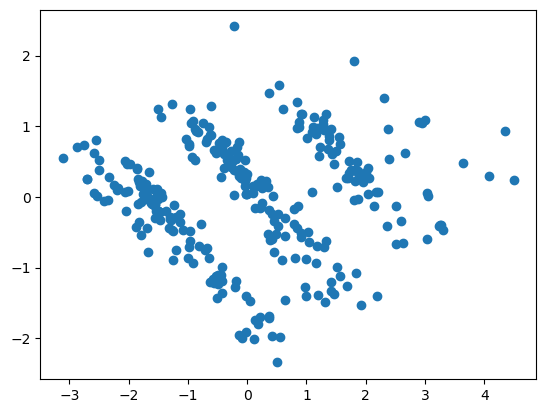

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x=X_pca[:,0], y = X_pca[:,1])
plt.show()

In [32]:
X = data.drop(['price'], axis=1)
y = data.price

In [33]:
X

,rooms,area1,district,building_type,year_type,no_first_no_last,area3_bins
0,2.0,44.0,Автозаводский район,кирпич,новый_дом,False,1.0
1,2.0,32.0,Советский район,кирпич,новый_дом,False,1.0
2,2.0,45.0,Канавинский район,кирпич,новый_дом,True,1.0
3,1.0,30.8,Канавинский район,кирпич,новый_дом,True,0.0
4,2.0,48.0,Московский район,панель,старый_дом,True,1.0
...,...,...,...,...,...,...,...
316,1.0,29.9,Автозаводский район,шлакоблок,новый_дом,False,1.0
317,1.0,44.5,Нижегородский район,блок+утеплитель,старый_дом,True,1.0
318,1.0,31.5,Ленинский район,кирпич,новый_дом,True,0.0
319,1.0,30.9,Московский район,панель,новый_дом,False,0.0


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3, random_state=12)

In [35]:
type(X_test)

pandas.core.frame.DataFrame

In [36]:
obj_cols = list(X_train.columns[X_train.dtypes=='object'])
num_cols = list(X_train.columns[X_train.dtypes!='object'])
obj_cols,num_cols

(['district', 'building_type', 'year_type'],
 ['rooms', 'area1', 'no_first_no_last', 'area3_bins'])

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# from sklearn.linear_model import Ridge,Lasso
#from sklearn.preprocessing import PolynomialFeatures
# enc = OneHotEncoder(handle_unknown='ignore')

ct = ColumnTransformer(
    [
        ("categorial", OneHotEncoder(handle_unknown='ignore', drop='first'), obj_cols),
        ("numeric", StandardScaler(), num_cols)
    ],
    sparse_threshold=0
)


# pipe = Pipeline(
#     [
#         ('data_transformer', ct), 
#         ('feature_construction', PolynomialFeatures(degree=2, include_bias=False)),
#     ]
# )

In [38]:
X_train_transformed = ct.fit_transform(X_train)

In [39]:
X_train_transformed.shape

(224, 17)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)

pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

total_explained_variance = pca.explained_variance_ratio_.cumsum()

In [41]:
pca.explained_variance_ratio_

array([0.1682976 , 0.12787506, 0.09390724, 0.07429972, 0.07250961,
       0.06935363, 0.0658544 , 0.06505658, 0.05721455, 0.05107251,
       0.04582102, 0.03399883, 0.02853069, 0.02184602, 0.01425724,
       0.00602808, 0.00407722])

In [42]:
total_explained_variance

array([0.1682976 , 0.29617266, 0.3900799 , 0.46437961, 0.53688922,
       0.60624285, 0.67209725, 0.73715383, 0.79436838, 0.84544089,
       0.89126192, 0.92526074, 0.95379143, 0.97563746, 0.9898947 ,
       0.99592278, 1.        ])

In [43]:
total_explained_variance[total_explained_variance >= .95]

array([0.95379143, 0.97563746, 0.9898947 , 0.99592278, 1.        ])

In [44]:
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = X_train_scaled.shape[1] - n_over_95 + 1

In [45]:
n_to_reach_95

13

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestRegressor


pipe = Pipeline(
    [
        ('data_transformer', ct), 
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_to_reach_95)),
        ('feature_selection', SelectFromModel(Lasso(alpha=100000)) ),
        ('ridge', Ridge(alpha=10.0)),
    ]
)

In [47]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('data_transformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('categorial',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['district', 'building_type',
                                                   'year_type']),
                                                 ('numeric', StandardScaler(),
                                                  ['rooms', 'area1',
                                                   'no_first_no_last',
                                                   'area3_bins'])])),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=13)),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=100000))),
                ('ridge', Ridge(alpha=10.0))])

In [48]:
pipe[-2].estimator_.coef_

array([ 435289.7324391 ,  546344.65578601, -324839.19126221,
       -599045.8241895 ,  111447.14173789,       0.        ,
            -0.        , -173945.22971461, -209122.32032638,
             0.        ,  176901.22217356,  377819.54788235,
            -0.        ])

In [49]:
pipe[-2].get_feature_names_out

<bound method SelectorMixin.get_feature_names_out of SelectFromModel(estimator=Lasso(alpha=100000))>

In [50]:
y_pred = pipe.predict(X_test)

<Axes: >

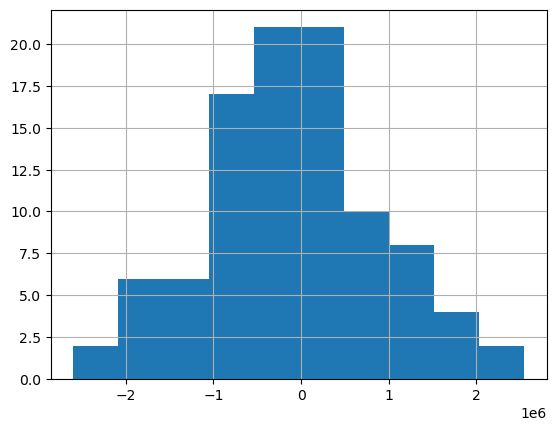

In [51]:
(y_test - y_pred).hist()

<Axes: xlabel='price', ylabel='price'>

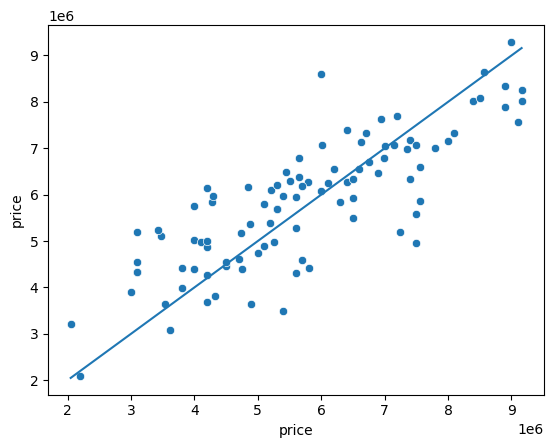

In [53]:
import seaborn as sns
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test)

In [54]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,y_pred)

0.1545704150322379

Сохраним полученную модель:

In [55]:
import pickle

# save the model as a pickle file
model_pkl_file = "apartment_prices_regression_pca_claster.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(pipe, file)